# Telecom Churn Case Study

 

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

##### Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

##### Definitions of Churn

There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 
Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

##### High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

##### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 
##### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

    The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Data Dictionary

The data dictionary contains meanings of abbreviations. Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

### Data Preparation

The following data preparation steps are crucial for this problem:

    1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

    2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

    3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

### Modelling

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

    It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

    It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

You can take the following suggestive steps to build the model:

    Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

    Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

    Derive new features.

    Reduce the number of variables using PCA.

    Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

    Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

    Finally, choose a model based on some evaluation metric.

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.


## As suggested in the problem statement the following following steps are planned in the present study:

    1. Importing Packages, Data and Data Preparation
    
    Undestanding the Data
    Dropping the Features with no variance
    Missing Value Treatment
    Filtering High Value Customers
    Identifying the Churners and Dropping irrelevant Features
    Deriving New Features
    Dropping features having negligible correlation with target Feature
    Checking Correlation and Dropping highly correlated Features
    Univariate,Bivariate and Multivariate Analysis
    Splitting data into Training and Test set
    Feature Scaling
    Data Imbalance Treatment
    


    2. Building predictor Model

    Principal component Analysis
    Logistic Regression model with varying threshold for improving recall
    SVM model with different class weights for improving recall
    Decision Tree model with best parameters and its performance metrics
    Random Forest Classifier model with best parameters and its performance metrics
    XGBoost Classifier model with best parameters and its performance metrics
    Comparing performance metrices 


    3. Building interpretable model

    Decide top n features using Lasso technique
    Optimize the models 
    Build model with final set of features
    Visualize the features's impact on churn


    4. Business Recommendation
    
    Using the derived features from the interpretable models to make recommendations.
    

### 1. Importing Packages, Data and Data Preparation

In [118]:
#Basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



# Model Building
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Data: Loading and Understanding
pd.set_option('display.max_columns',None)
telecom = pd.read_csv("telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Setting mobile_number as index as it is a unique identifier for a customer

telecom = telecom.set_index('mobile_number')
telecom.shape

(99999, 225)

In [4]:
telecom.info()#(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 172.4+ MB


In [5]:
# Check the features exhibiting no variance and drop them.

col_to_drop =[]
for col in telecom.columns:
    if telecom[col].nunique() == 1:
        col_to_drop.append(col)
print(len(col_to_drop),col_to_drop)
telecom.drop(col_to_drop,axis=1,inplace = True)
telecom.shape

16 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


(99999, 209)

### Missing Value Treatment

In [6]:
# lets check the null values present in the data
pd.set_option('display.max_rows',None)
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
count_rech_3g_6             74.846748
max_rech_data_6             74.846748
av_rech_amt_data_6          74.846748
total_rech_data_6           74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
fb_user_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_7            74.428744
fb_user_7                   74.428744
count_rech_2g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
total_rech_data_7           74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
total_rech_data_9           74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
date_of_last_rech_data_9    74.077741
arpu_2g_9                   74.077741
av_rech_amt_

- In the telecom churn dataset, the null values are mostly due to the fact that the customer's activity with respect to those features are absent in that period. 
- Hence, for date features the null values are imputed as the beginning of the period, i.e 6/1/2014.
- The null values for the remaining features can be be imputed as zero.

In [7]:
date_cols = [col for col in telecom.columns if 'date_' in col]
len(date_cols)

8

In [8]:
for feature in date_cols:
    telecom[feature] = telecom[feature].fillna('6/1/2014')

In [9]:
other_cols = [col for col in telecom.columns if not col in date_cols]
len(other_cols)

201

In [10]:
for feature in other_cols:
    telecom[feature] = telecom[feature].fillna(0)

In [11]:
# lets check the null values present in the data
pd.set_option('display.max_rows',None)
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False)

arpu_6                      0.0
total_ic_mou_7              0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_9         0.0
last_day_rch_amt_6          0.0
last_day_rch_amt_7          0.0
last_day_rch_amt_8          0.0
last_day_rch_amt_9          0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_data_9    0.0
total_rech_data_6           0.0
total_rech_data_7           0.0
total_rech_data_8           0.0
total_rech_data_9           0.0
max_rech_data_6             0.0
max_rech_data_7             0.0
max_rech_data_8             0.0
max_rech_data_9             0.0
count_rech_2g_6             0.0
count_rech_2g_7             0.0
count_rech_2g_8             0.0
count_rech_2g_9             0.0
date_of_last_rech_6         0.0
max_rech_amt_9              0.0
max_rech_amt_8              0.0
ic_others_7                 0.0
total_ic_mou_9              0.0
spl_ic_mou_6                0.0
spl_ic_m

### Filter high-value customers

As mentioned in the problem  we need to predict churn only for the high-value customers. The  high-value customers are defined as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [12]:
# First we create columns for total amount of recharge for the months 6,7,8 and 9 by multiplication of the two 
#existing columns average_rech_amt and total_rech_data for respective months. 

telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7'] 
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8'] 
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

# Find the average recharge done in the 'good phase' i.e.first two months(june & july) 
# Total amount spend would be the sum of total data recharge done & total call/sms recharges
telecom_av_rech67 = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7']
+ telecom['total_rech_data_amt_6'] + telecom['total_rech_data_amt_7'])/2

# take 70 percentile of the calculated average amount
percentile_70 = np.percentile(telecom_av_rech67, 70.0)
print("70 percentile is : ", percentile_70)

# fitler the given data set based on 70th percentile
telecom_HP = telecom[telecom_av_rech67 >= percentile_70]

print("Dimensions of the filtered dataset:",telecom_HP.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 213)


### Tag churners and remove attributes of the churn phase

In [13]:
# Introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# Calculate churn/non-churn based on the usage i.e., theyhave not made any calls (either incoming or outgoing) AND 
#have not used mobile internet even once in the churn phase.  

telecom_HP['churn'] = np.where(telecom_HP[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_HP.shape

(30001, 214)

In [14]:
#After tagging churners, remove all the attributes corresponding to the churn phasei.e., those having ‘ _9’, etc. 
#in their names).

cols_to_drop = [col for col in telecom_HP.columns if '_9' in col]
print(len(cols_to_drop),cols_to_drop)
telecom_HP.drop(cols_to_drop, axis=1, inplace=True)
telecom_HP.shape

52 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 162)

In [15]:
# lets find out churn/non churn percentage

telecom_HP['churn'].value_counts()/len(telecom_HP)*100


0    91.863605
1     8.136395
Name: churn, dtype: float64

In [16]:
telecom_HP.info(verbose=True, buf=None, max_cols=None, memory_usage=None, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 7000842753 to 7000498689
Data columns (total 162 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    30001 non-null  float64
 1    arpu_7                    30001 non-null  float64
 2    arpu_8                    30001 non-null  float64
 3    onnet_mou_6               30001 non-null  float64
 4    onnet_mou_7               30001 non-null  float64
 5    onnet_mou_8               30001 non-null  float64
 6    offnet_mou_6              30001 non-null  float64
 7    offnet_mou_7              30001 non-null  float64
 8    offnet_mou_8              30001 non-null  float64
 9    roam_ic_mou_6             30001 non-null  float64
 10   roam_ic_mou_7             30001 non-null  float64
 11   roam_ic_mou_8             30001 non-null  float64
 12   roam_og_mou_6             30001 non-null  float64
 13   roam_og_mou_7             3000

In [17]:
# lets check for columns that can be changed to integers, floats or date types
object_data = telecom_HP.select_dtypes(include=['object'])
object_data.iloc[0]

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
Name: 7000842753, dtype: object

In [18]:
# convert to datetime
for col in object_data.columns:
    telecom_HP[col] = pd.to_datetime(telecom_HP[col])

### Deriving New Features

The last recharge date is taken as the most recent last recharge date (in month 6,7,8) available in the data.
1st September 2014 is taken as a reference date to count the number of days since last recharge which seems to be a relevant feature for identifying churners.

In [19]:
#Obtaining most recent last recharge date for data 
telecom_HP['date_of_last_rech_data']= telecom_HP[['date_of_last_rech_data_6','date_of_last_rech_data_7',
                                                  'date_of_last_rech_data_8']].max(axis=1)
telecom_HP[['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
            'date_of_last_rech_data']].head()                                        

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data
mobile_number,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-08-08
7000701601,2014-06-01,2014-06-01,2014-06-01,2014-06-01
7001524846,2014-06-01,2014-07-31,2014-08-23,2014-08-23
7002124215,2014-06-01,2014-06-01,2014-06-01,2014-06-01
7000887461,2014-06-01,2014-07-07,2014-08-06,2014-08-06


In [20]:
#Obtaining most recent last recharge date 
telecom_HP['date_of_last_rech']= telecom_HP[['date_of_last_rech_6','date_of_last_rech_7',
                                                  'date_of_last_rech_8']].max(axis=1)
telecom_HP[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech']].head()            

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech
mobile_number,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-08-08
7000701601,2014-06-27,2014-07-25,2014-08-26,2014-08-26
7001524846,2014-06-25,2014-07-31,2014-08-30,2014-08-30
7002124215,2014-06-30,2014-07-31,2014-08-31,2014-08-31
7000887461,2014-06-18,2014-07-07,2014-08-24,2014-08-24


In [21]:
#Obtaining the number of days since last rechage of data and for last recharge
telecom_HP['ref_date'] = datetime.date(2014, 9, 1)
telecom_HP['ref_date'] = pd.to_datetime(telecom_HP['ref_date'])
# for data recharge
telecom_HP['no_of_days_since_last_rech_data'] = telecom_HP['ref_date'] - telecom_HP['date_of_last_rech_data']
telecom_HP['no_of_days_since_last_rech_data'] = telecom_HP['no_of_days_since_last_rech_data'].astype('timedelta64[D]')
# for recharge
telecom_HP['no_of_days_since_last_rech'] = telecom_HP['ref_date'] - telecom_HP['date_of_last_rech']
telecom_HP['no_of_days_since_last_rech'] = telecom_HP['no_of_days_since_last_rech'].astype('timedelta64[D]')
telecom_HP[['no_of_days_since_last_rech_data','no_of_days_since_last_rech']].head()

,no_of_days_since_last_rech_data,no_of_days_since_last_rech
mobile_number,,
7000842753,24.0,24.0
7000701601,92.0,6.0
7001524846,9.0,2.0
7002124215,92.0,1.0
7000887461,26.0,8.0


In [22]:
telecom_HP.shape

(30001, 167)

In [23]:
#Now the date and other intermediate features used for the derived features no_of_days_since_last_rech_data and 
#no_of_days_since_last_rech can be dropped.

cols_to_drop = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                 'date_of_last_rech_data','date_of_last_rech','ref_date']
telecom_HP.drop(cols_to_drop,axis=1,inplace = True)
print(len(cols_to_drop),cols_to_drop)

9 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data', 'date_of_last_rech', 'ref_date']


In [24]:
telecom_HP.shape

(30001, 158)

For comparing the data of good phase(6 and 7) with action phase (8), taking average usage of 6th and 7th month and deducting usage of 8th month.
Positive value of the derived feature would mean that usage has dropped from good phase to action phase (i.e. average usage of 6th and 7th month > usage of 8th month)
Negative value would mean usage has increased in action phase.
Feature with 'derived_' prefix in their names are derived as mentioned above.



In [25]:
# Taking the features common in 6th, 7th and 8th month

features = zip(telecom_HP.columns[telecom_HP.columns.str.contains("6", case=False)], 
               telecom_HP.columns[telecom_HP.columns.str.contains("7", case=False)], 
               telecom_HP.columns[telecom_HP.columns.str.contains("8", case=False)])

In [26]:
monthly_features = list(features)
for i in range(len(monthly_features)):
    feat_6 = monthly_features[i][0]
    feat_7 = monthly_features[i][1]
    feat_8 = monthly_features[i][2]
  
    new_feat_name = 'new_' + feat_6[:-2]
    telecom_HP[new_feat_name]=(( telecom_HP[feat_6]+ telecom_HP[feat_7])/2)- telecom_HP[feat_8]

    # Dropping the individual month features are deriving new features
    telecom_HP.drop([feat_6, feat_7, feat_8], axis=1, inplace=True)

In [27]:
telecom_HP.shape

(30001, 58)

In [28]:
#Define a new fearure new_vbc_3g as follows:
telecom_HP['new_vbc_3g']= ((telecom_HP['jun_vbc_3g']+ telecom_HP['jul_vbc_3g'])/2)- telecom_HP['aug_vbc_3g']
#Drop the all the other vbc_3g for all the monthsfeatures
list_to_drop=['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g']
telecom_HP.drop(list_to_drop, axis=1, inplace=True)
print(len(list_to_drop),list_to_drop)

4 ['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'sep_vbc_3g']


In [29]:
telecom_HP.shape

(30001, 55)

In [30]:
# Find the covaruiance matrix of the data and check the correlation coefficient of the features with the target 
#feature churn
corr = telecom_HP.corr().round(2)
corr['churn'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,churn,1.00
1,no_of_days_since_last_rech,0.30
2,new_arpu,0.28
3,new_total_rech_amt,0.27
4,new_total_og_mou,0.26
5,new_total_rech_num,0.25
6,new_std_og_mou,0.23
7,new_offnet_mou,0.21
8,new_onnet_mou,0.18
9,new_std_og_t2m_mou,0.18


In [31]:
#Drop the features having neglible correlation ( < .05) with the target feature churn
df_corr = corr['churn']
low_corr = df_corr.loc[df_corr.abs() < 0.05].index.to_list()
telecom_HP.drop(low_corr, axis=1, inplace=True)
print(len(low_corr),low_corr)

13 ['new_roam_ic_mou', 'new_roam_og_mou', 'new_loc_og_t2f_mou', 'new_loc_og_t2c_mou', 'new_std_og_t2f_mou', 'new_og_others', 'new_loc_ic_t2f_mou', 'new_std_ic_t2f_mou', 'new_spl_ic_mou', 'new_isd_ic_mou', 'new_ic_others', 'new_night_pck_user', 'new_monthly_2g']


In [32]:
telecom_HP.shape

(30001, 42)

### Checking feature correlation

In [116]:
#Check the correlation coefficients to examine which variables are highly correlated
#corr = telecom_HP.corr().round(2)
#plt.figure(figsize = (25, 18))
#sns.heatmap(corr, annot = True, cmap = 'Blues')
#plt.show()


In [33]:
#Check the correlation coefficients to examine which variables are highly correlated

corr = telecom_HP.corr().round(2).replace(1,0)

#lets check the correlation amongst the features, drop the highly correlated ones

corr.iloc[:,:]= np.tril(corr, k = -1)
corr = corr.stack()
corr[(corr.abs() > 0.80)].sort_values(ascending = False)

new_sachet_2g       new_count_rech_2g      0.98
new_total_og_mou    new_std_og_mou         0.90
new_count_rech_2g   new_total_rech_data    0.90
new_std_og_t2m_mou  new_offnet_mou         0.89
new_sachet_2g       new_total_rech_data    0.89
new_std_og_t2t_mou  new_onnet_mou          0.88
new_sachet_3g       new_count_rech_3g      0.88
new_arpu_2g         new_arpu_3g            0.86
new_total_ic_mou    new_loc_ic_mou         0.85
new_total_rech_amt  new_arpu               0.84
new_loc_ic_mou      new_loc_ic_t2m_mou     0.81
dtype: float64

In [34]:
#Make a list of highly correlated features ( => 0.80) and one from each pair
high_corr = ['new_sachet_2g','new_std_og_mou','new_count_rech_2g','new_total_rech_data','new_std_og_t2m_mou',
             'new_sachet_3g','new_std_og_t2t_mou','new_arpu_3g','new_loc_ic_mou','new_total_rech_amt',
             'new_loc_ic_t2m_mou']
#,'new_monthly_3g','new_std_ic_t2m_mou','new_offnet_mou', 'new_loc_og_t2m_mou','new_arpu_2g', 'new_loc_og_t2t_mou']
print(len(high_corr),high_corr)
telecom_HP.drop(high_corr, axis=1, inplace=True)       

11 ['new_sachet_2g', 'new_std_og_mou', 'new_count_rech_2g', 'new_total_rech_data', 'new_std_og_t2m_mou', 'new_sachet_3g', 'new_std_og_t2t_mou', 'new_arpu_3g', 'new_loc_ic_mou', 'new_total_rech_amt', 'new_loc_ic_t2m_mou']


In [35]:
telecom_HP.shape

(30001, 31)

In [36]:
telecom_HP.head()

,aon,churn,no_of_days_since_last_rech_data,no_of_days_since_last_rech,new_arpu,new_onnet_mou,new_offnet_mou,new_loc_og_t2t_mou,new_loc_og_t2m_mou,new_loc_og_mou,new_isd_og_mou,new_spl_og_mou,new_total_og_mou,new_loc_ic_t2t_mou,new_std_ic_t2t_mou,new_std_ic_t2m_mou,new_std_ic_mou,new_total_ic_mou,new_total_rech_num,new_max_rech_amt,new_last_day_rch_amt,new_max_rech_data,new_count_rech_3g,new_av_rech_amt_data,new_vol_2g_mb,new_vol_3g_mb,new_arpu_2g,new_monthly_3g,new_fb_user,new_total_rech_data_amt,new_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,968,1,24.0,24.0,-7.7025,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,-0.160,0.000,0.000,0.000,-5.440,1.5,0.0,0.0,0.0,0.0,0.0,9.975,7.555,0.00,0.0,0.0,0.0,20.200
7000701601,802,1,92.0,6.0,-1961.9650,3.97,184.385,1.105,215.725,222.245,-9.920,-4.25,198.225,17.890,-6.030,-32.115,-17.130,163.510,-2.0,-395.0,-779.0,0.0,0.0,0.0,0.000,0.000,0.00,0.0,0.0,0.0,-38.680
7001524846,315,0,9.0,2.0,298.1100,347.28,-48.835,244.870,25.230,270.095,0.000,-10.23,298.450,16.530,0.190,12.605,12.795,49.635,6.0,92.0,15.0,54.0,0.0,19.5,177.970,363.535,0.00,0.0,-0.5,-30.0,495.375
7002124215,720,0,92.0,1.0,-81.6570,32.12,-156.085,-18.020,-14.940,-34.175,0.000,0.00,-123.975,-13.205,9.840,-48.780,-38.945,-91.550,-3.0,0.0,-25.0,0.0,0.0,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.000
7000887461,604,0,26.0,8.0,-232.8425,16.23,-118.505,16.230,-65.585,-49.345,0.005,-17.66,-102.270,-35.765,-13.125,-35.250,-48.375,-127.095,0.0,-89.5,89.5,-89.5,-1.0,-92.0,0.230,-710.375,0.22,0.0,-0.5,-184.0,-14.520


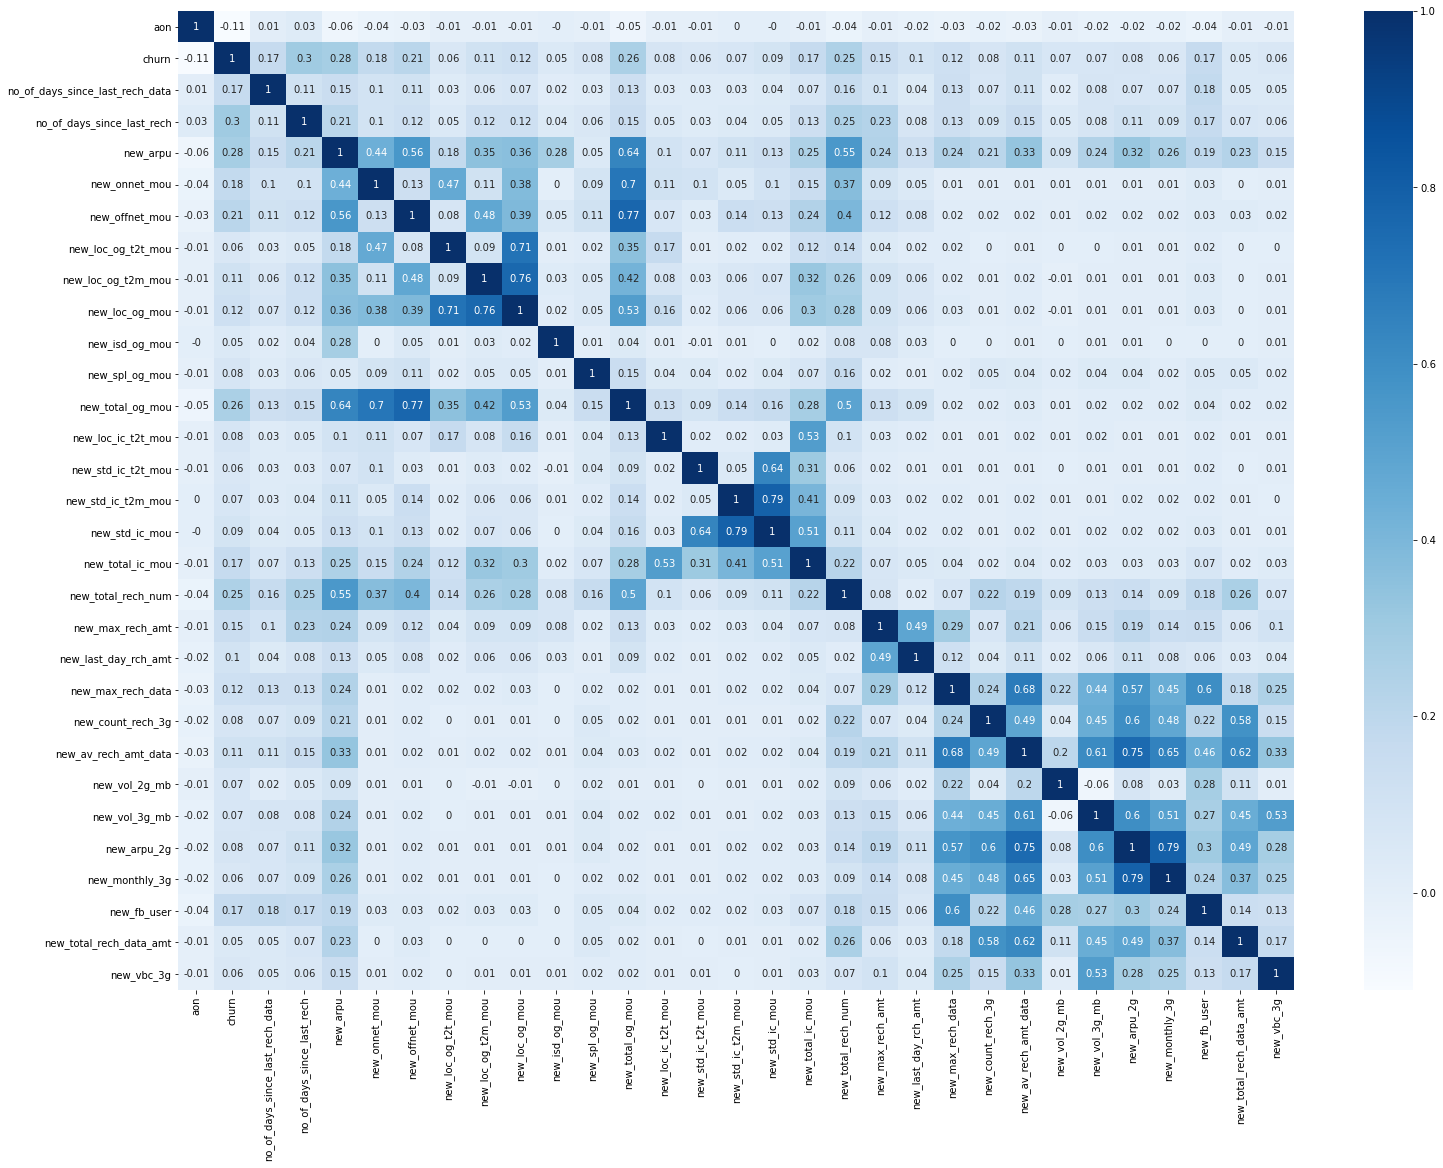

In [37]:
#Plot the heatmap for the data
corr = telecom_HP.corr().round(2)
plt.figure(figsize = (25, 18))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

### Let us see the distribution of these features using distplots.

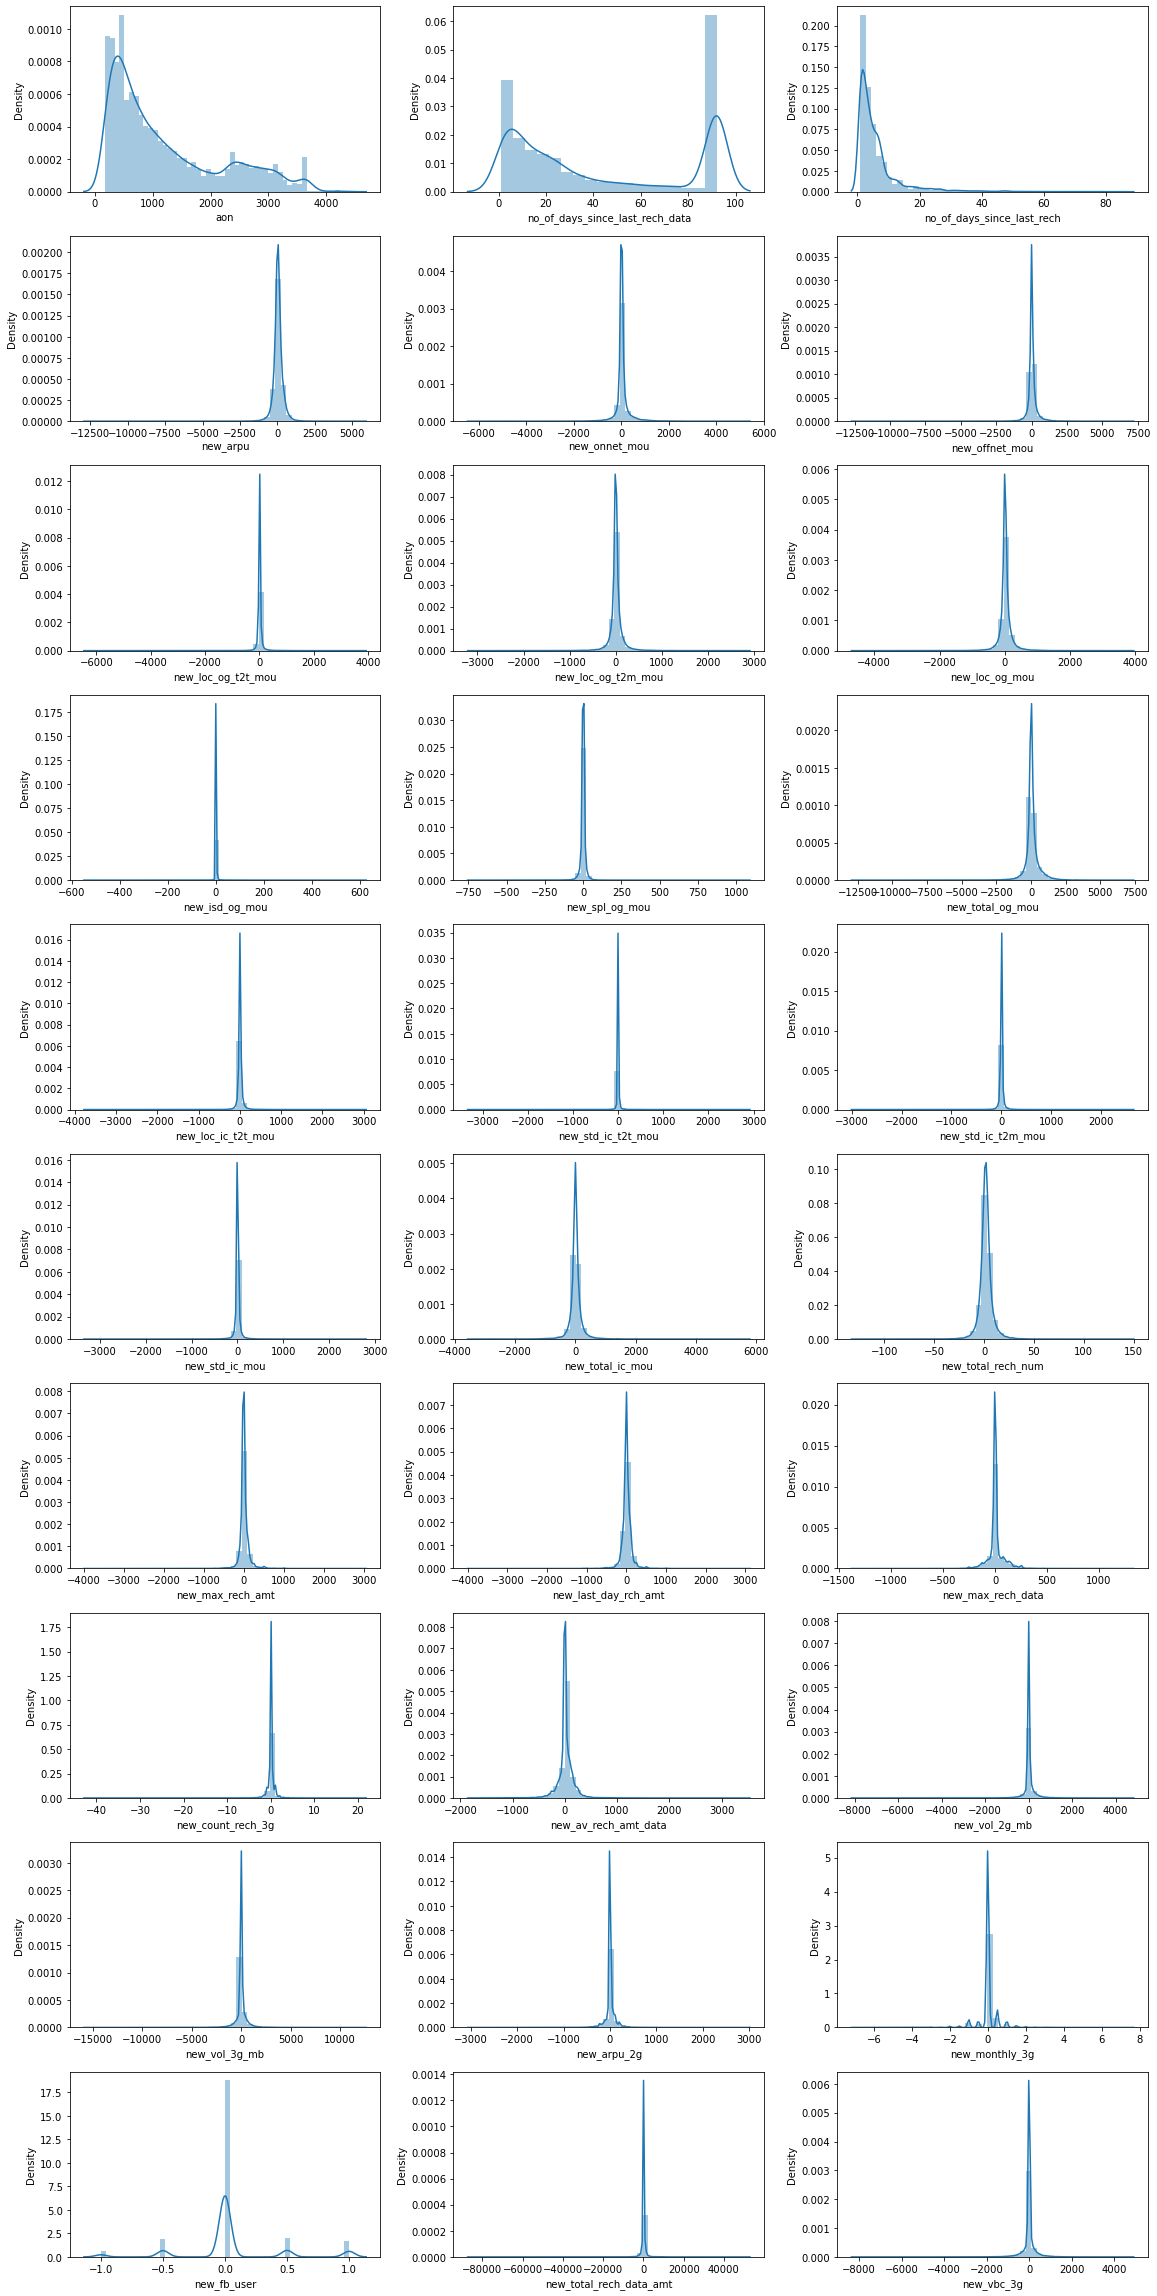

In [38]:
myPlot = plt.subplots(figsize=(16, 32))
feature_list = telecom_HP.columns.tolist()
feature_list.remove('churn')
i = 0
for feature in feature_list:
    i+=1
    plt.subplot(10,3, i)
    plt.subplots_adjust(hspace = 4.0)
    sns.distplot(telecom_HP[feature])
    plt.tight_layout()


### Let us see the distribtion of these features with the target feature

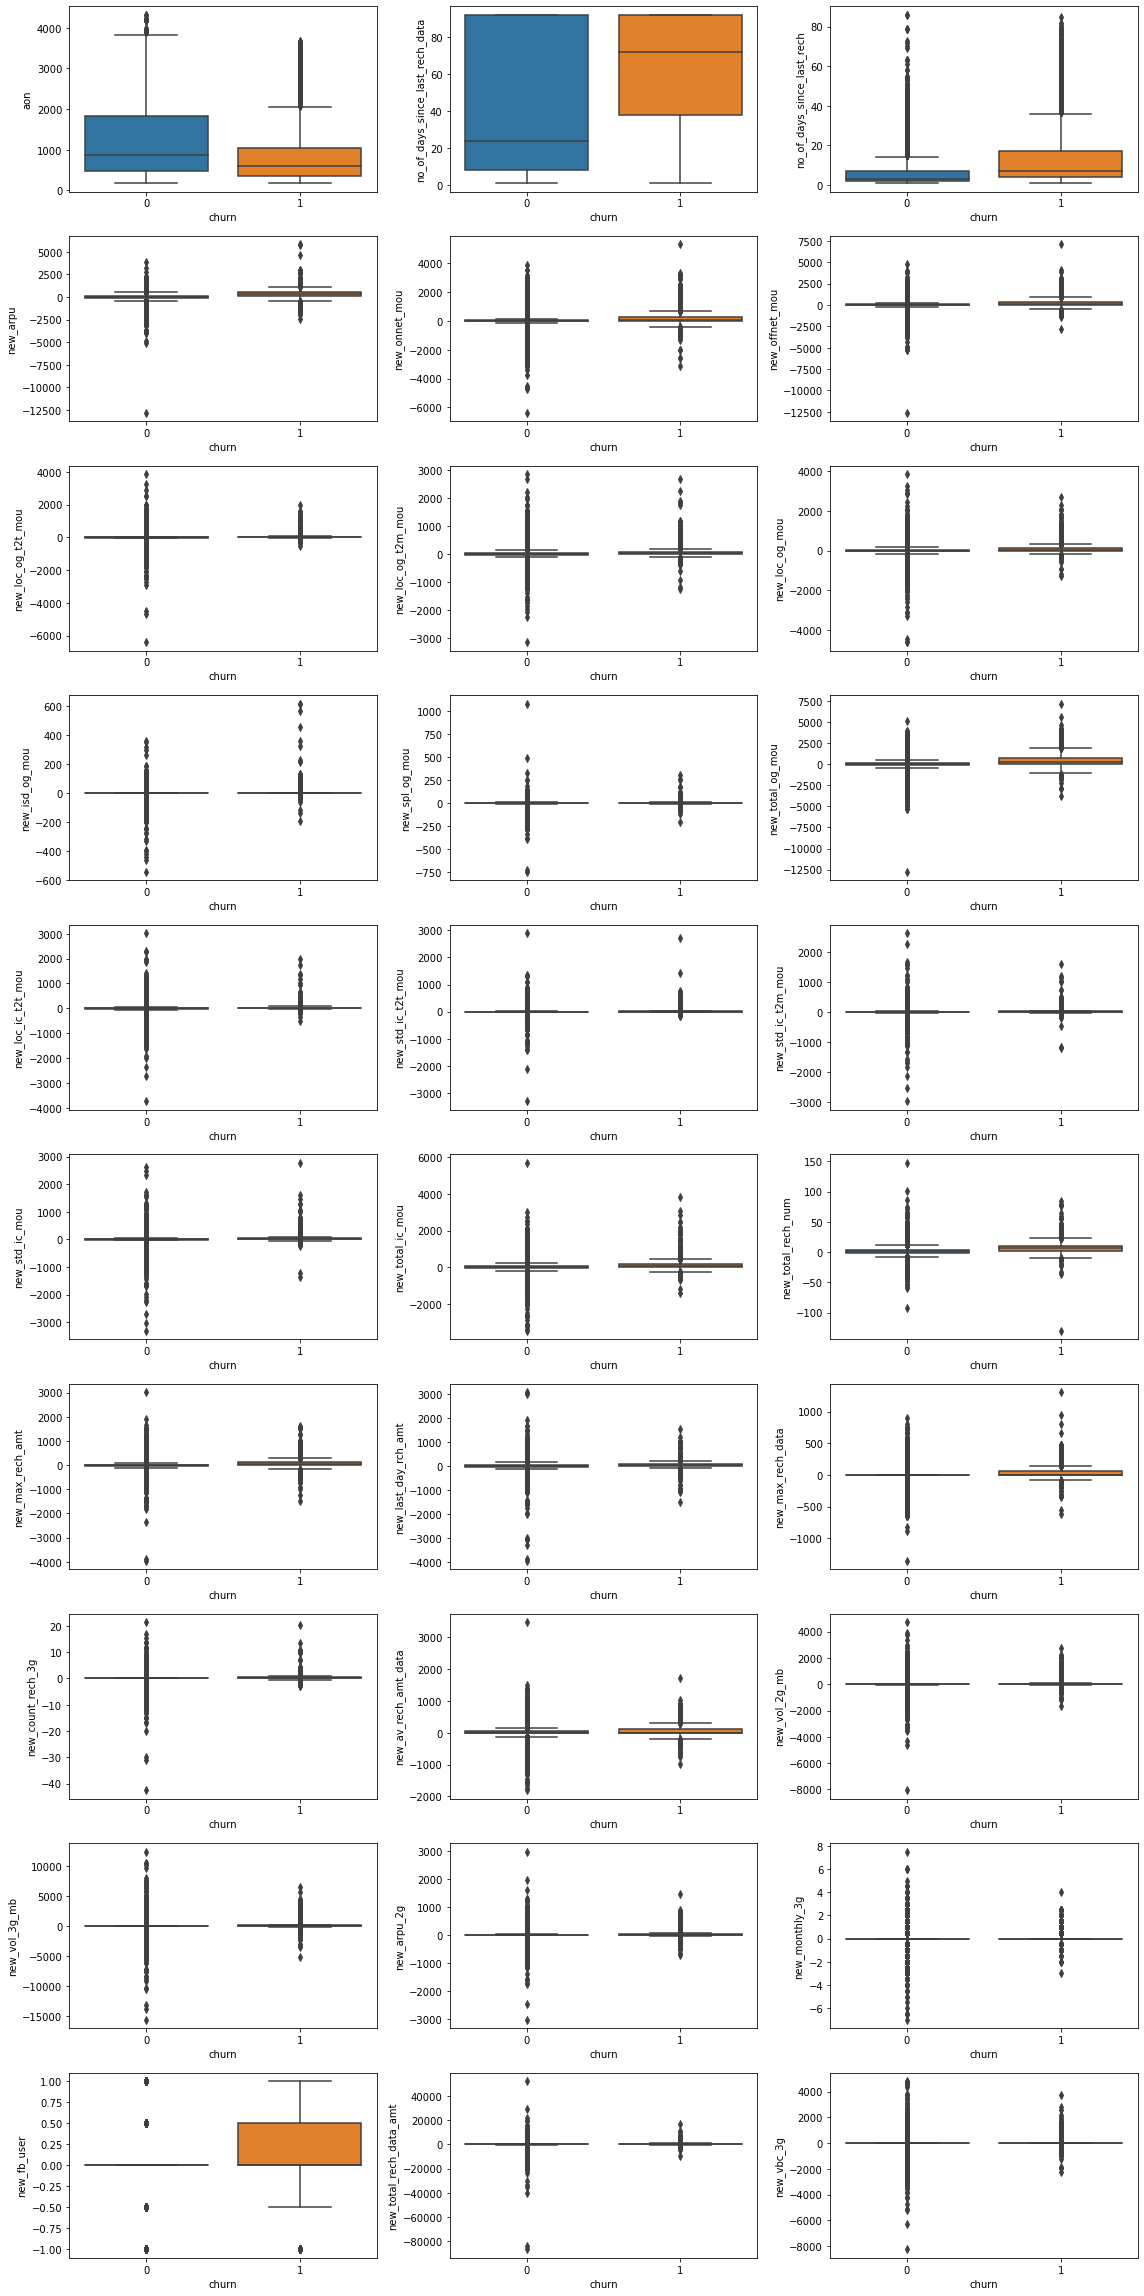

In [39]:
myPlot = plt.subplots(figsize=(16, 32))
feature_list = telecom_HP.columns.tolist()
feature_list.remove('churn')
i = 0
for feature in feature_list:
    i+=1
    plt.subplot(10,3, i)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(x=telecom_HP['churn'],y=telecom_HP[feature])
    plt.tight_layout()

In [40]:
telecom_HP.head()

,aon,churn,no_of_days_since_last_rech_data,no_of_days_since_last_rech,new_arpu,new_onnet_mou,new_offnet_mou,new_loc_og_t2t_mou,new_loc_og_t2m_mou,new_loc_og_mou,new_isd_og_mou,new_spl_og_mou,new_total_og_mou,new_loc_ic_t2t_mou,new_std_ic_t2t_mou,new_std_ic_t2m_mou,new_std_ic_mou,new_total_ic_mou,new_total_rech_num,new_max_rech_amt,new_last_day_rch_amt,new_max_rech_data,new_count_rech_3g,new_av_rech_amt_data,new_vol_2g_mb,new_vol_3g_mb,new_arpu_2g,new_monthly_3g,new_fb_user,new_total_rech_data_amt,new_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,968,1,24.0,24.0,-7.7025,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,-0.160,0.000,0.000,0.000,-5.440,1.5,0.0,0.0,0.0,0.0,0.0,9.975,7.555,0.00,0.0,0.0,0.0,20.200
7000701601,802,1,92.0,6.0,-1961.9650,3.97,184.385,1.105,215.725,222.245,-9.920,-4.25,198.225,17.890,-6.030,-32.115,-17.130,163.510,-2.0,-395.0,-779.0,0.0,0.0,0.0,0.000,0.000,0.00,0.0,0.0,0.0,-38.680
7001524846,315,0,9.0,2.0,298.1100,347.28,-48.835,244.870,25.230,270.095,0.000,-10.23,298.450,16.530,0.190,12.605,12.795,49.635,6.0,92.0,15.0,54.0,0.0,19.5,177.970,363.535,0.00,0.0,-0.5,-30.0,495.375
7002124215,720,0,92.0,1.0,-81.6570,32.12,-156.085,-18.020,-14.940,-34.175,0.000,0.00,-123.975,-13.205,9.840,-48.780,-38.945,-91.550,-3.0,0.0,-25.0,0.0,0.0,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.000
7000887461,604,0,26.0,8.0,-232.8425,16.23,-118.505,16.230,-65.585,-49.345,0.005,-17.66,-102.270,-35.765,-13.125,-35.250,-48.375,-127.095,0.0,-89.5,89.5,-89.5,-1.0,-92.0,0.230,-710.375,0.22,0.0,-0.5,-184.0,-14.520


In [41]:
# lets create X & y dataset for model building, X will obviously not have the target feature "churn". 

X = telecom_HP.drop(['churn'], axis=1)
print(X.shape)

# y will only have "churn"

y = telecom_HP['churn']
print(y.shape)


(30001, 30)
(30001,)


In [96]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 30)
Dimension of X_test: (9001, 30)


In [97]:
# apply scaling on the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
col_list = list(X)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = col_list)
X_test = pd.DataFrame(X_test, columns = col_list)
df_train.head()

,aon,no_of_days_since_last_rech_data,no_of_days_since_last_rech,new_arpu,new_onnet_mou,new_offnet_mou,new_loc_og_t2t_mou,new_loc_og_t2m_mou,new_loc_og_mou,new_isd_og_mou,new_spl_og_mou,new_total_og_mou,new_loc_ic_t2t_mou,new_std_ic_t2t_mou,new_std_ic_t2m_mou,new_std_ic_mou,new_total_ic_mou,new_total_rech_num,new_max_rech_amt,new_last_day_rch_amt,new_max_rech_data,new_count_rech_3g,new_av_rech_amt_data,new_vol_2g_mb,new_vol_3g_mb,new_arpu_2g,new_monthly_3g,new_fb_user,new_total_rech_data_amt,new_vbc_3g
0,1.370598,-1.057505,-0.269741,-0.172857,-0.100153,-0.177026,-0.043990,-0.233020,-0.194359,-0.01786,0.071372,-0.178296,-0.216130,-0.025208,0.013059,-0.005764,-0.208392,0.030878,-0.074381,-0.054473,-0.079476,-0.025870,0.087776,-0.319062,-0.000701,0.024441,-0.024120,-0.121147,0.140089,0.004366
1,0.125577,-1.084546,-0.399588,0.326276,-0.095708,-0.095780,-0.034091,-0.037991,-0.046968,-0.01786,0.002981,-0.118345,0.403018,-0.025208,-0.026144,-0.025963,0.577945,0.909431,-0.074381,-0.016752,-0.079476,0.977401,-0.202706,0.761786,0.011409,0.136731,-0.024120,-0.121147,-0.051423,0.004366
2,-0.944723,-1.111587,-0.529434,0.413187,-0.112666,-0.112700,-0.071853,-0.084990,-0.106833,-0.01786,0.347545,-0.131863,-0.391888,-0.025208,-0.026144,-0.036773,-0.143476,0.616580,0.434945,0.411902,0.894590,-0.025870,1.425345,0.997876,-0.000701,-0.035076,-0.024120,-0.121147,0.937321,0.004366
3,0.581736,-0.651889,-0.659281,2.064989,1.519497,1.890181,-0.116031,-0.051225,-0.112244,-0.01786,-0.289709,1.532464,-0.210943,0.036196,0.513268,0.424506,0.136392,-0.115547,0.405631,0.394756,-1.705070,-0.527506,-0.932289,1.275738,1.868694,-0.967947,-1.077154,-1.516695,-0.100572,2.975695
4,-0.784649,1.322111,-0.269741,1.048834,1.389908,0.807354,0.974738,1.463664,1.655044,-0.01786,0.689500,1.435214,0.067905,0.041238,0.124766,0.120150,0.319229,0.396942,0.292040,0.288450,-0.079476,-0.025870,-0.081109,-0.085642,-0.000701,-0.044865,-0.024120,-0.121147,-0.015155,0.004366


### Treating imbalance in data set

In [98]:
# As the given dataset is imbalanced, lets balance the dataset

sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)
print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

Dimension of X_tr Shape: (38576, 30)
Dimension of y_tr Shape: (38576,)
Imbalance in Training dataset: 1.0


### PCA
Transforming the data using PCA to obtain independent features

(38576, 30)
(9001, 30)


array([20.81, 34.25, 41.01, 47.72, 54.1 , 59.07, 63.42, 67.45, 71.32,
       74.5 , 77.15, 79.77, 82.2 , 84.53, 86.81, 88.87, 90.69, 92.45,
       93.91, 95.26, 96.32, 97.17, 97.94, 98.63, 99.26, 99.59, 99.88,
       99.94, 99.96, 99.96])

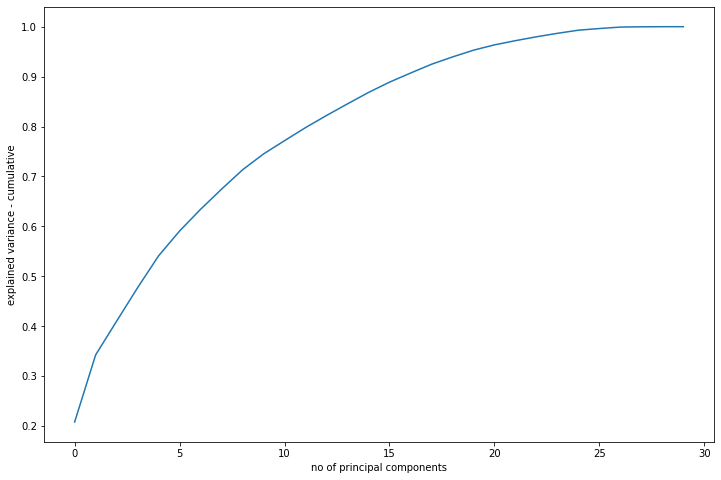

In [99]:
# apply PCA on train data

pca = IncrementalPCA(n_components=30) 
pca.fit(X_tr)
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

# scree plot to check the variance explained by different PCAs

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


The first 25 PCA columns explains > 99% of the variance.

Let us try classification with Logistic regression with these 25 components.

## Model Building

### Logistic Regression with PCA components 

In [46]:

lr_pca25 = IncrementalPCA(n_components=25) 
lr_pca25.fit(X_tr)
X_tr_pca25 = lr_pca25.fit_transform(X_tr)
print(X_tr_pca25.shape)

X_test_pca25 = lr_pca25.transform(X_test)
print(X_test_pca25.shape)


(38576, 25)
(9001, 25)


In [47]:
# A function to calculate the different metrics from the true and predicted target values
def evaluate_model(confusion):
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    recall = TP/(TP + FN)
    precision = TP/(TP + FP)
    F1_score = 2 * precision * recall / (precision + recall)
    return accuracy,recall,precision,F1_score

In [48]:
# A data frame to view the comparative metric values for various classifiers
df_metric = pd.DataFrame(data=np.zeros((5,4)), index=['Logistic Regression','SVM', 'Decision Tree', 'Random Forest', 'XGBoost'], 
                         columns=['Accuracy', 'Recall', 'Precision','F1_score'])


In [49]:
#Let us try classification using Logistic Regression 

In [50]:
# Let's run the model using the selected variables pca25
# Create a LogisticRegression Classifier
lr_pca25 = LogisticRegression(C=1e9)
#Train the model using the training sets
lr_pca25.fit(X_tr_pca25, y_tr)
# predict the target on training and test sets
y_tr_pred = lr_pca25.predict(X_tr_pca25)
y_pred = lr_pca25.predict(X_test_pca25)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test,y_pred)
print("Performance of Logistic Regression with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Logistic  Regression with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))


Performance of Logistic Regression with PCA25 Classifier on training data
Accuracy: 0.8 Recall: 0.78 Precision: 0.81 F1_score: 0.79
Performance of Logistic  Regression with PCA25 Classifier on test data
Accuracy: 0.82 Recall: 0.77 Precision: 0.28 F1_score: 0.41


The accuracy is good 82%. However, in the present problem the recall is important as retaing a customer is very much desirable. Hence,the precision-recall curve is drawn with different threshold values to see the effect on recall. 

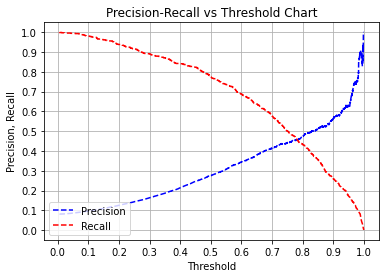

In [51]:
#Predict test_y values and probabilities based on fitted logistic regression model
pred_y = lr_pca25.predict(X_test_pca25) 

probs_y = lr_pca25.predict_proba(X_test_pca25) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1])
#retrieve probability of being 1(in second column of probs_y)

pr_auc = metrics.auc(recall, precision)

# Major ticks every 0.2, minor ticks every 0.1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")

plt.grid(True)

As the recall increses, the precision decreases. An optimum value of recall and precision can only be found using
cost analysis. However, for increasing recall the threshold value should be decreased. Here, a threshold of 0.4 whch yields a recall score of 84% on the test data is being used.

In [52]:

pred_proba_df = pd.DataFrame(lr_pca25.predict_proba(X_tr_pca25))
threshold_list = [ 0.4]
for i in threshold_list:
    print ('\nFor threshold =', i )
    y_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_tr.to_numpy().reshape(y_tr.to_numpy().size,1),
                                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1))
    print('Accuracy = ', round(test_accuracy,2))

    confusion_train = confusion_matrix(y_tr.to_numpy().reshape(y_tr.to_numpy().size,1),
                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1))
    print(classification_report(y_tr.to_numpy().reshape(y_tr.to_numpy().size,1),
                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1)))
 
    
    


For threshold = 0.4
Accuracy =  0.78
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     19288
           1       0.75      0.83      0.79     19288

    accuracy                           0.78     38576
   macro avg       0.78      0.78      0.78     38576
weighted avg       0.78      0.78      0.78     38576



In [53]:

pred_proba_df = pd.DataFrame(lr_pca25.predict_proba(X_test_pca25))
threshold_list = [ 0.4]
for i in threshold_list:
    print ('\nFor threshold =', i )
    y_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1))
    print('Accuracy = ', round(test_accuracy,2))

    confusion_test = confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1))
    print(classification_report(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_pred.iloc[:,1].to_numpy().reshape(y_pred.iloc[:,1].to_numpy().size,1)))
 
    
    


For threshold = 0.4
Accuracy =  0.74
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      8272
           1       0.21      0.84      0.34       729

    accuracy                           0.74      9001
   macro avg       0.60      0.78      0.59      9001
weighted avg       0.92      0.74      0.80      9001



In [54]:
print("Performance of Logistic Regression with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Logistic Regression with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_metric.loc['Logistic Regression', 'Accuracy'] = round(accuracy, 2)
df_metric.loc['Logistic Regression', 'Recall'] = round(recall,2)
df_metric.loc['Logistic Regression', 'Precision'] = round(precision, 2)
df_metric.loc['Logistic Regression', 'F1_score'] = round(F1_score, 2)


Performance of Logistic Regression with PCA25 Classifier on training data
Accuracy: 0.78 Recall: 0.83 Precision: 0.75 F1_score: 0.79
Performance of Logistic Regression with PCA25 Classifier on test data
Accuracy: 0.74 Recall: 0.84 Precision: 0.21 F1_score: 0.34


### Let us try classification using SVM Classifier with the same features. 

In [56]:
# Let's run the model using the selected variables pca25
#Create a svm Classifier
svm_pca25 = svm.SVC(kernel='linear') 
#Train the model using the training sets
svm_pca25.fit(X_tr_pca25, y_tr)
#Predict the response for train and test dataset
y_tr_pred = svm_pca25 .predict(X_tr_pca25)
y_pred = svm_pca25.predict(X_test_pca25)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test,y_pred)

print("Performance of SVM with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of SVM with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))



Performance of SVM with PCA25 Classifier on training data
Accuracy: 0.8 Recall: 0.77 Precision: 0.82 F1_score: 0.79
Performance of SVM with PCA25 Classifier on test data
Accuracy: 0.83 Recall: 0.77 Precision: 0.3 F1_score: 0.43


### Let  us try Recall can be improved by modifying the class weights in SVM Classifier

In [57]:
wt_0 = [0.2,0.4,0.6,0.8,1.0]
recall_list=[]
precision_list = []
for w in wt_0:
    svm_pca25 = svm.SVC(kernel='linear', gamma='scale', class_weight={1 : 1.0,0 : w})
    svm_pca25.fit(X_tr_pca25, y_tr)
    y_pred = svm_pca25.predict(X_test_pca25)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    accuracy,recall,precision,F1_score = evaluate_model(confusion)
    recall_list.append(round(recall,2))
    precision_list.append(round(precision,2))
    print('w =', w)
    print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
          "F1_score:",round(F1_score,2))


w = 0.2
Accuracy: 0.32 Recall: 0.98 Precision: 0.1 F1_score: 0.19
w = 0.4
Accuracy: 0.61 Recall: 0.89 Precision: 0.16 F1_score: 0.27
w = 0.6
Accuracy: 0.73 Recall: 0.84 Precision: 0.21 F1_score: 0.33
w = 0.8
Accuracy: 0.8 Recall: 0.81 Precision: 0.26 F1_score: 0.39
w = 1.0
Accuracy: 0.83 Recall: 0.77 Precision: 0.3 F1_score: 0.43


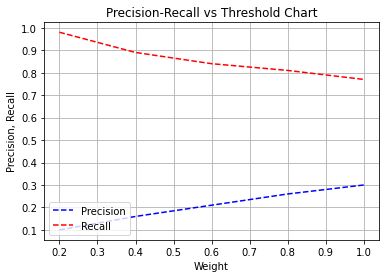

In [58]:
#Plotting the recall-precison curve for different weights.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
major_ticks = np.arange(0, 1.1, .1)
minor_ticks = np.arange(0, 1.1, .1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(wt_0, precision_list, "b--", label="Precision")
plt.plot(wt_0, recall_list, "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Weight")
plt.legend(loc="lower left")

plt.grid(True)

In [59]:
wt_0 = [0.6]
recall_list=[]
precision_list = []
for w in wt_0:
    svm_pca25 = svm.SVC(kernel='linear', gamma='scale', class_weight={1 : 1.0,0 : w})
    svm_pca25.fit(X_tr_pca25, y_tr)
    y_tr_pred = svm_pca25.predict(X_tr_pca25)
    y_pred = svm_pca25.predict(X_test_pca25)
    confusion_train = confusion_matrix(y_tr,y_tr_pred)
    confusion_test = confusion_matrix(y_test, y_pred)
    accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
    recall_list.append(round(recall,2))
    precision_list.append(round(precision,2))
    print("Performance of SVM with PCA25 Classifier on training data")
    accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
    print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
          "F1_score:",round(F1_score,2))
    print("Performance of SVM with PCA25 Classifier on test data")
    accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
    print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
          "F1_score:",round(F1_score,2))

df_metric.loc['SVM', 'Accuracy'] = round(accuracy, 2)
df_metric.loc['SVM', 'Recall'] = round(recall,2)
df_metric.loc['SVM', 'Precision'] = round(precision, 2)
df_metric.loc['SVM', 'F1_score'] = round(F1_score, 2)

Performance of SVM with PCA25 Classifier on training data
Accuracy: 0.78 Recall: 0.84 Precision: 0.75 F1_score: 0.79
Performance of SVM with PCA25 Classifier on test data
Accuracy: 0.73 Recall: 0.84 Precision: 0.21 F1_score: 0.33


### Let us try classification using the Decision Tree Classifier with the same features and optimizing using Grid Search

In [61]:
#Create a decision tree Classifier and optimize the parameters using grid search
dt_pca25 = DecisionTreeClassifier(random_state=100)
params = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}
grid_search = GridSearchCV(estimator=dt_pca25, 
                           param_grid=params, 
                           cv=3, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(X_tr_pca25, y_tr)
print(grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


In [62]:
dt_final = grid_search.best_estimator_
dt_final.fit(X_tr_pca25, y_tr)
y_pred = dt_final.predict(X_test_pca25)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of Decision Tree with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Decision Tree with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_metric.loc['Decision Tree', 'Accuracy'] = round(accuracy, 2)
df_metric.loc['Decision Tree', 'Recall'] = round(recall,2)
df_metric.loc['Decision Tree', 'Precision'] = round(precision, 2)
df_metric.loc['Decision Tree', 'F1_score'] = round(F1_score, 2)

Performance of Decision Tree with PCA25 Classifier on training data
Accuracy: 0.78 Recall: 0.84 Precision: 0.75 F1_score: 0.79
Performance of Decision Tree with PCA25 Classifier on test data
Accuracy: 0.8 Recall: 0.72 Precision: 0.25 F1_score: 0.37


### Let us try classification using Random Forest Classifier with the same features and optimize the parameters using Grid Search

In [63]:
#Create a Random Forest Classifier 
rf_pca25 = RandomForestClassifier(random_state=101, n_jobs=-1)

params = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [5, 20, 50],
    'max_features': [3, 4, 5],
    'n_estimators': [50, 100]
}

grid_search = GridSearchCV(estimator=rf_pca25, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_tr_pca25,y_tr)
rf_final = grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [64]:

rf_final.fit(X_tr_pca25, y_tr)
y_tr_pred = rf_final.predict(X_tr_pca25)
y_pred = rf_final.predict(X_test_pca25)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of Random Forest with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Random Forest with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_metric.loc['Random Forest', 'Accuracy'] = round(accuracy, 2)
df_metric.loc['Random Forest', 'Recall'] = round(recall,2)
df_metric.loc['Random Forest', 'Precision'] = round(precision, 2)
df_metric.loc['Random Forest', 'F1_score'] = round(F1_score, 2)

Performance of Random Forest with PCA25 Classifier on training data
Accuracy: 0.98 Recall: 0.99 Precision: 0.98 F1_score: 0.98
Performance of Random Forest with PCA25 Classifier on test data
Accuracy: 0.9 Recall: 0.62 Precision: 0.42 F1_score: 0.5


### Let us try classification using XG Boost Classifier with the same features and optimize the parameters using Grid Search

In [65]:
#cCreate an XG Boost model
xgb_pca25 = xgb.XGBClassifier()

parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [10, 20],
              'n_estimators': [100, 200, 500]}

xgb_pca25 = GridSearchCV(estimator=xgb_pca25,
                      param_grid=parameters,
                      n_jobs=-1,
                      cv=3,
                      scoring='recall',
                      verbose=1,
                      refit=True)

xgb_pca25.fit(X_tr_pca25, y_tr)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[16:03:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [66]:
xgb_pca25.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500}

In [67]:
xgb_final = xgb_pca25.best_estimator_
xgb_final.fit(X_tr_pca25, y_tr)
y_tr_pred = xgb_final.predict(X_tr_pca25)
y_pred = xgb_final.predict(X_test_pca25)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of XGBoost Classifier with PCA25 Classifier on training data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of XGBoost Classifier with PCA25 Classifier on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_metric.loc['XGBoost', 'Accuracy'] = round(accuracy, 2)
df_metric.loc['XGBoost', 'Recall'] = round(recall,2)
df_metric.loc['XGBoost', 'Precision'] = round(precision, 2)
df_metric.loc['XGBoost', 'F1_score'] = round(F1_score, 2)

[16:04:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of XGBoost Classifier with PCA25 Classifier on training data
Accuracy: 1.0 Recall: 1.0 Precision: 1.0 F1_score: 1.0
Performance of XGBoost Classifier with PCA25 Classifier on test data
Accuracy: 0.91 Recall: 0.56 Precision: 0.45 F1_score: 0.5


## Comparitive performance of various predictive models

In [68]:
df_metric

,Accuracy,Recall,Precision,F1_score
Logistic Regression,0.74,0.84,0.21,0.34
SVM,0.73,0.84,0.21,0.33
Decision Tree,0.80,0.72,0.25,0.37
Random Forest,0.90,0.62,0.42,0.50
XGBoost,0.91,0.56,0.45,0.50


### We have tried to optimize the models based on recall. The Logistic Regression model seems to be the best for prediction. The SVM model though comparable is computationally expensive.
- The recall value can be further improved in the above two models by changing threshold value and class weight, respectively. However, this means sacrificing other performance metrics.
- The optimal value of recall can only be determined by undertaking a cost-benefit-analysis by the business.

## Final Predictor Model
- The Logistic Regression model with appropriate threshold is recommended as the final predictor model.
- In our view, a threshold value of 0.4 provides a fair recall while not compromising too much on other metrics.

## Building Interpretable Models

In [133]:
# A data frame to view the comparative metric values for various classifiers
df_interp = pd.DataFrame(data=np.zeros((3,4)), index=['Logistic Regression','SVM', 'Decision Tree'], 
                         columns=['Accuracy', 'Recall', 'Precision','F1_score'])


### Logistic Regression model with feature reduction using L1 norm (Lasso)

In [134]:
# feature selection using lasso
 
lr = LogisticRegression(penalty="l1", dual=False,C = .0009, class_weight = {1:1,0:1},solver ='liblinear')
lr.fit(X_tr, y_tr)
lr_model = SelectFromModel(lr, prefit=True)
X_lasso_lr = lr_model.transform(X_tr)
position = lr_model.get_support(indices=True)
print(position)
X_tr.columns[position].to_list()
coef = lr.coef_
print(coef.shape)
coef = coef[0].tolist()
coef_lasso = [coef[x] for x in position]
coef_lasso
lasso_dict = {'Feature': X_tr.columns[position].to_list(),
        'Value': coef_lasso
        }
df_lasso = pd.DataFrame(lasso_dict)
# df_lasso.sort_values(by=['Value'], key=abs, ascending=False, inplace = True)
# df_lasso
df_lasso_lr = df_lasso.reindex(df_lasso.Value.abs().sort_values().index[::-1])
df_lasso_lr

[ 0  1  2  3 11 16 17 18 19 27]
(1, 30)


,Feature,Value
2,no_of_days_since_last_rech,0.358457
4,new_total_og_mou,0.277406
0,aon,-0.275909
1,no_of_days_since_last_rech_data,0.272157
3,new_arpu,0.219368
9,new_fb_user,0.205092
6,new_total_rech_num,0.157871
5,new_total_ic_mou,0.121276
8,new_last_day_rch_amt,0.047803
7,new_max_rech_amt,0.026434


### We reduce the number of features from 30 to 10 here with the selected features listed above in decreasing order of importance.

In [135]:
# Performance evaluation on training and test data

y_tr_pred = lr.predict(X_tr)
y_pred = lr.predict(X_test)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of Logistic Regression on training data")
accuracy, recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Logistic Regression on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_interp.loc['Logistic Regression', 'Accuracy'] = round(accuracy, 2)
df_interp.loc['Logistic Regression', 'Recall'] = round(recall,2)
df_interp.loc['Logistic Regression', 'Precision'] = round(precision, 2)
df_interp.loc['Logistic Regression', 'F1_score'] = round(F1_score, 2)

Performance of Logistic Regression on training data
Accuracy: 0.78 Recall: 0.79 Precision: 0.78 F1_score: 0.79
Performance of Logistic Regression on test data
Accuracy: 0.79 Recall: 0.81 Precision: 0.25 F1_score: 0.38


### SVM model with feature reduction using L1 norm (Lasso)

In [136]:
# feature selection using lasso
from sklearn.svm import LinearSVC
 
svc = LinearSVC(C=0.0002, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso_svc = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)
print(X_lasso.shape)
print(position)
X_tr.columns[position].to_list()
coef = lr.coef_
print(coef.shape)
coef = coef[0].tolist()
coef_lasso = [coef[x] for x in position]
coef_lasso
lasso_dict = {'Feature': X_tr.columns[position].to_list(),
        'Value': coef_lasso
        }
df_lasso = pd.DataFrame(lasso_dict)
# df_lasso.sort_values(by=['Value'], key=abs, ascending=False, inplace = True)
# df_lasso
df_lasso_svm = df_lasso.reindex(df_lasso.Value.abs().sort_values().index[::-1])
df_lasso_svm

(38576, 10)
[ 0  1  2  3 11 16 17 18 19 27]
(1, 30)


,Feature,Value
2,no_of_days_since_last_rech,0.358457
4,new_total_og_mou,0.277406
0,aon,-0.275909
1,no_of_days_since_last_rech_data,0.272157
3,new_arpu,0.219368
9,new_fb_user,0.205092
6,new_total_rech_num,0.157871
5,new_total_ic_mou,0.121276
8,new_last_day_rch_amt,0.047803
7,new_max_rech_amt,0.026434


### We notice that we arrive at the same set of features using SVM model as Logistic Regression.

In [137]:
# Performance evaluation on training and test data

y_tr_pred = svc.predict(X_tr)
y_pred = svc.predict(X_test)

confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of SVM on training data")
accuracy, recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of SVM on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_interp.loc['SVM', 'Accuracy'] = round(accuracy, 2)
df_interp.loc['SVM', 'Recall'] = round(recall,2)
df_interp.loc['SVM', 'Precision'] = round(precision, 2)
df_interp.loc['SVM', 'F1_score'] = round(F1_score, 2)

Performance of SVM on training data
Accuracy: 0.78 Recall: 0.79 Precision: 0.77 F1_score: 0.78
Performance of SVM on test data
Accuracy: 0.78 Recall: 0.81 Precision: 0.24 F1_score: 0.37


### Decision tree with lasso features derived earlier from Logistic Regression

In [138]:
# feature vector for decision tree
lasso_features = list(X_tr.columns[position])
print("Lasso Features: ", lasso_features)
X_lasso = X_lasso_lr
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, position]

Lasso Features:  ['aon', 'no_of_days_since_last_rech_data', 'no_of_days_since_last_rech', 'new_arpu', 'new_total_og_mou', 'new_total_ic_mou', 'new_total_rech_num', 'new_max_rech_amt', 'new_last_day_rch_amt', 'new_fb_user']


### Fine tuning the hyperparameters
Using Grid Search with recall scoring

In [139]:
# GridSearchCV to find optimal max_depth
#from sklearn.model_selection import KFold
#from sklearn.model_selection import GridSearchCV


# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(10, 50, 10),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dt_gs = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt_gs, param_grid = param_grid, scoring= 'recall',
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Recall", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Recall 0.8932518726429416
DecisionTreeClassifier(max_depth=15, min_samples_leaf=40, min_samples_split=100)


In [140]:
# Performance evaluation on training and test data

dt_final = grid_search.best_estimator_
dt_final.fit(X_lasso, y_tr)
y_tr_pred = dt_final.predict(X_lasso)
y_pred = dt_final.predict(X_test_lasso)
confusion_train = confusion_matrix(y_tr,y_tr_pred)
confusion_test = confusion_matrix(y_test, y_pred)

print("Performance of Decision Tree on training data")
accuracy, recall,precision,F1_score = evaluate_model(confusion_train)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))
print("Performance of Decision Tree on test data")
accuracy,recall,precision,F1_score = evaluate_model(confusion_test)
print("Accuracy:",round(accuracy,2),"Recall:",round(recall,2),"Precision:",round(precision,2),
      "F1_score:",round(F1_score,2))

df_interp.loc['Decision Tree', 'Accuracy'] = round(accuracy, 2)
df_interp.loc['Decision Tree', 'Recall'] = round(recall,2)
df_interp.loc['Decision Tree', 'Precision'] = round(precision, 2)
df_interp.loc['Decision Tree', 'F1_score'] = round(F1_score, 2)

Performance of Decision Tree on training data
Accuracy: 0.9 Recall: 0.91 Precision: 0.9 F1_score: 0.9
Performance of Decision Tree on test data
Accuracy: 0.87 Recall: 0.67 Precision: 0.35 F1_score: 0.46


In [141]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(60,30))
# plot_tree(dt_final, feature_names = X_tr.columns[position],class_names=['Churn', "No churn"],filled=True);


## Performance of Interpretable models
The models for, Logistic Regression, SVM & Decision Tree, were built with 10 features identified using Lasso. The following table compares their performance.

In [142]:
df_interp

,Accuracy,Recall,Precision,F1_score
Logistic Regression,0.79,0.81,0.25,0.38
SVM,0.78,0.81,0.24,0.37
Decision Tree,0.87,0.67,0.35,0.46


### The Logistic Regression model seems to be the best performing.
The features identified by the regression model combined with business knowledge will help us in understanding customer behaviour.

### The top 10 predictors

In [160]:
df_lasso_lr.set_index('Feature')

,Value
Feature,
no_of_days_since_last_rech,0.358457
new_total_og_mou,0.277406
aon,-0.275909
no_of_days_since_last_rech_data,0.272157
new_arpu,0.219368
new_fb_user,0.205092
new_total_rech_num,0.157871
new_total_ic_mou,0.121276
new_last_day_rch_amt,0.047803


### Visualizing the top few predictors

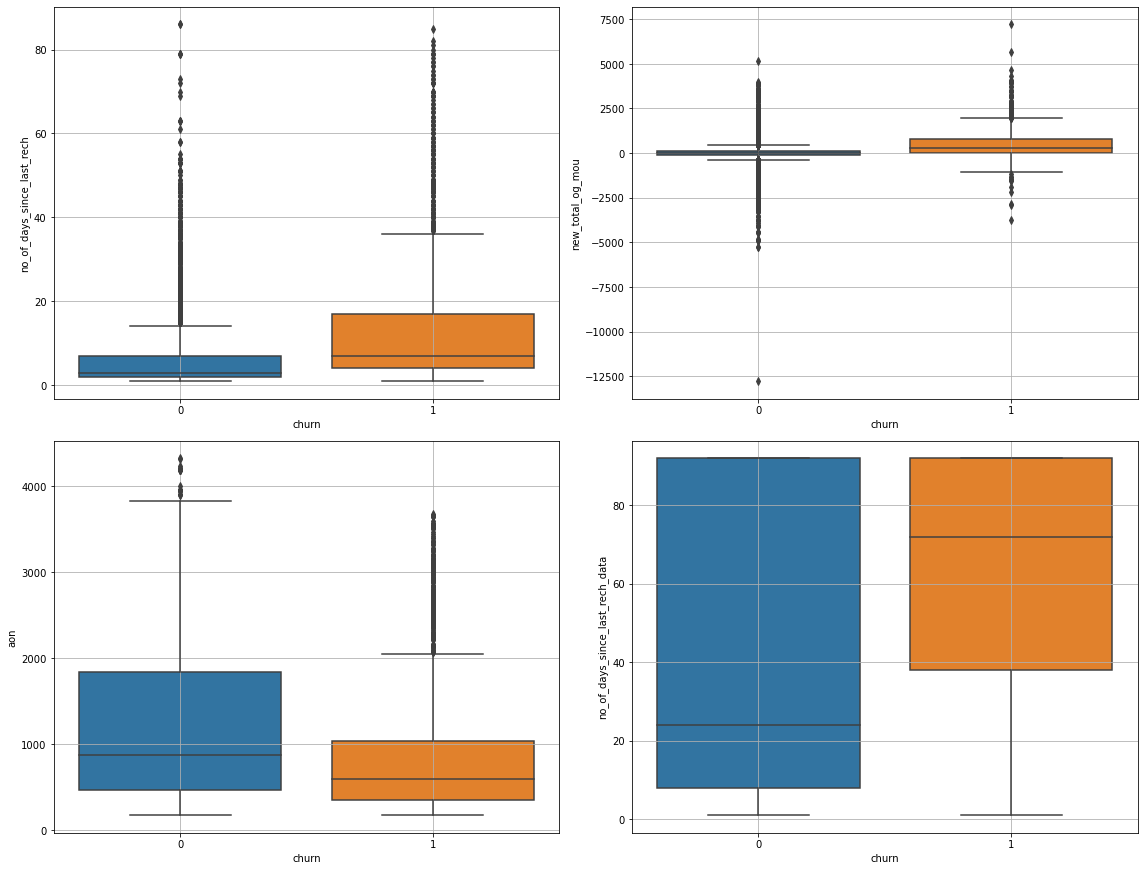

In [171]:
top4 = df_lasso_lr['Feature'].iloc[0:4].tolist()
myPlot = plt.subplots(figsize=(16, 60))
feature_list = telecom_HP.columns.tolist()
feature_list.remove('churn')
i = 0
for feature in top4:
    i+=1
    plt.subplot(10,2, i)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(x=telecom_HP['churn'],y=telecom_HP[feature])
    plt.tight_layout()
    plt.grid()

### Plotting churned vs. not churned separately for top few predictors

#### Number of days since last recharge and Number of days since last recharge for data

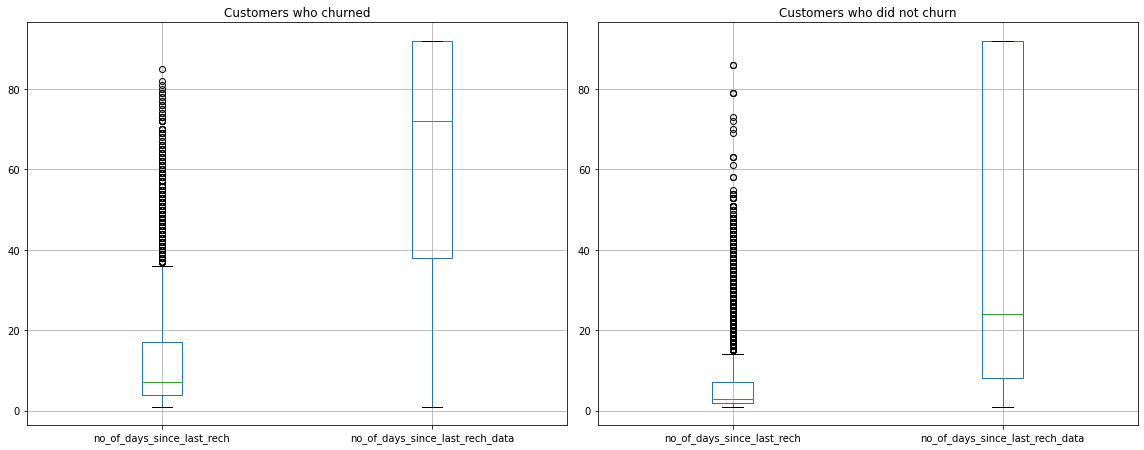

In [232]:
plt.subplots(figsize=(16, 60))
plt.subplot(10,2,1)
plt.grid()
plt.subplots_adjust(hspace = 4.0)
telecom_HP[telecom_HP['churn'] == 1][['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].boxplot()
plt.title("Customers who churned")
plt.subplot(10,2,2)
#plt.show()
telecom_HP[telecom_HP['churn'] == 0][['no_of_days_since_last_rech', 'no_of_days_since_last_rech_data']].boxplot()
plt.title("Customers who did not churn")
plt.tight_layout()


#### New total outgoing and minutes of use (new_total_og_mou)

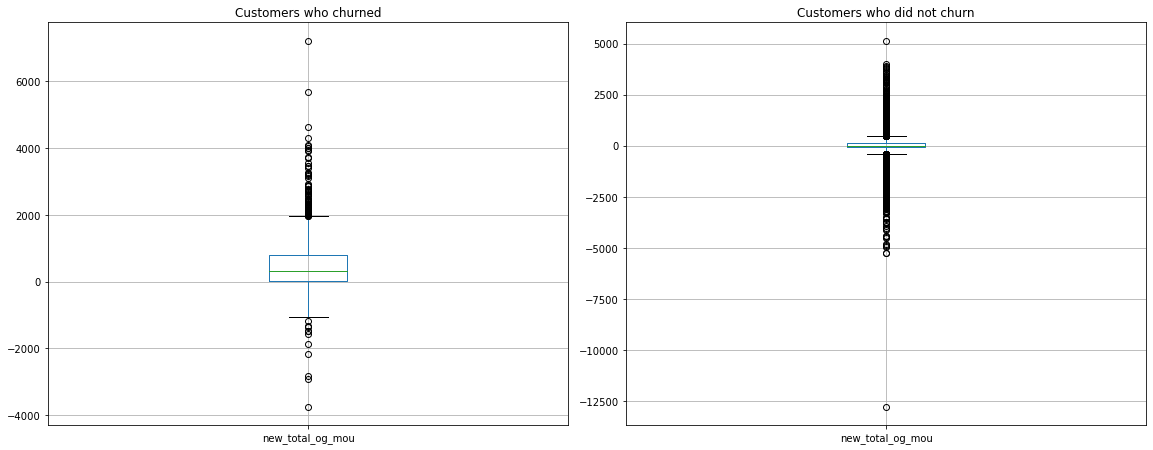

In [233]:
plt.subplots(figsize=(16, 60))
plt.subplot(10,2,1)
plt.grid()
plt.subplots_adjust(hspace = 4.0)
telecom_HP[telecom_HP['churn'] == 1][['new_total_og_mou']].boxplot()
plt.title("Customers who churned")
#plt.show()
plt.subplot(10,2,2)
telecom_HP[telecom_HP['churn'] == 0][['new_total_og_mou']].boxplot()
plt.title("Customers who did not churn")
plt.tight_layout()
#plt.show()

#### Age of Network (AON)

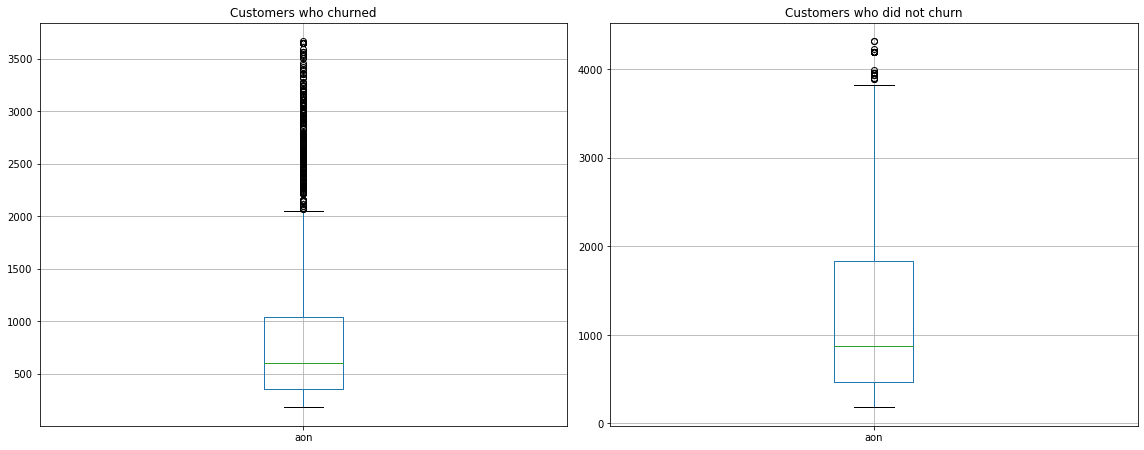

In [234]:
plt.subplots(figsize=(16, 60))
plt.subplot(10,2,1)
plt.grid()
plt.subplots_adjust(hspace = 4.0)
telecom_HP[telecom_HP['churn'] == 1][['aon']].boxplot()
plt.title("Customers who churned")
#plt.show()
plt.subplot(10,2,2)
telecom_HP[telecom_HP['churn'] == 0][['aon']].boxplot()
plt.title("Customers who did not churn")
#plt.show()
plt.tight_layout()

#### Average revenue per user (New ARPU)

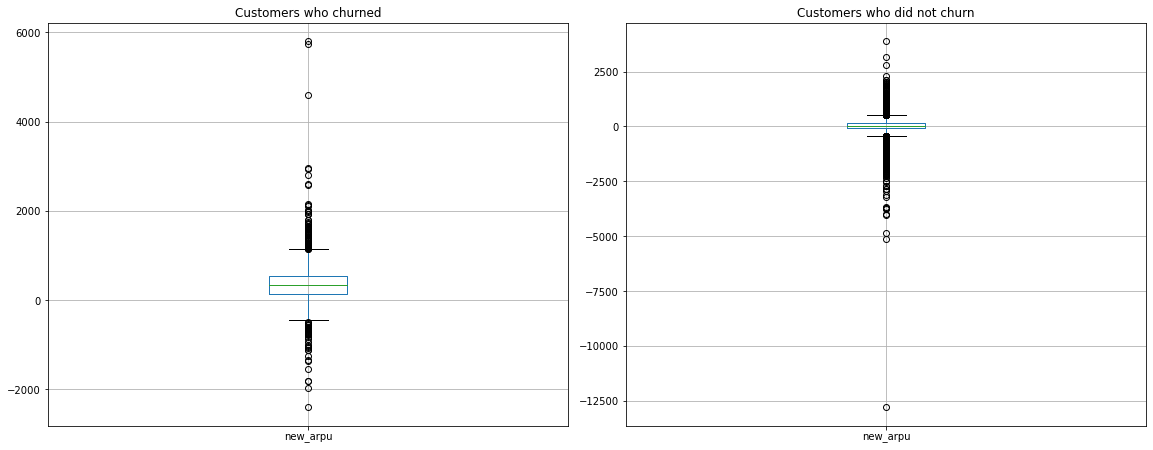

In [235]:
plt.subplots(figsize=(16, 60))
plt.subplot(10,2,1)
plt.grid()
plt.subplots_adjust(hspace = 4.0)
telecom_HP[telecom_HP['churn'] == 1][['new_arpu']].boxplot()
plt.title("Customers who churned")
#plt.show()
plt.subplot(10,2,2)
telecom_HP[telecom_HP['churn'] == 0][['new_arpu']].boxplot()
plt.title("Customers who did not churn")
#plt.show()
plt.tight_layout()

#### New FB User

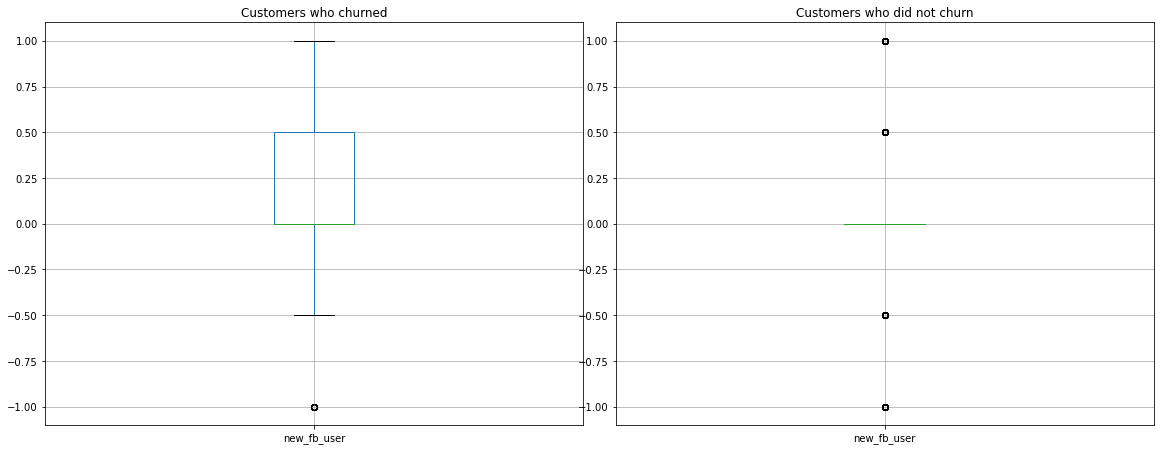

In [236]:
plt.subplots(figsize=(16, 60))
plt.subplot(10,2,1)
plt.grid()
plt.subplots_adjust(hspace = 4.0)
telecom_HP[telecom_HP['churn'] == 1][['new_fb_user']].boxplot()
plt.title("Customers who churned")
#plt.show()
plt.subplot(10,2,2)
telecom_HP[telecom_HP['churn'] == 0][['new_fb_user']].boxplot()
plt.title("Customers who did not churn")
#plt.show()
plt.tight_layout()

## Recommendations

The important features identified by the interpretable models must be carefully watched by the business. Any changes in the customer behaviour w.r.t these features should be analysed and appropriate action must be taken.

1.	The recharge activity of customers seems to be indicative in predicting churn. 
2.	Customers who have not recharged their data in the last 45-50 days seem to be likely to churn.
3.	Customers who have not recharged their minutes in the last 40 days seem likely to churn. For instance, customers who have not recharged in the month July are more likely to churn.
4.	However, care has to be taken when interpreting days since last recharge based on the pattern of a customer. This is because they may be using plans for 3 months instead of 1!
5.	Customers who have stayed with the network for longer periods are typically more likely to stay. We notice that customers who have stayed for less than 750 days seem to be likely to churn. Roughly speaking customers who have stayed for over 1000 days seem to be very loyal.
6.	A fall in the recharge amounts is also indicative of a customer thinking of migrating.
7.	Average revenue per customer for churn cases tends to go down to zero.


## Conclusion

Predictor Models
In telecom churn problem, it is very expensive to attract new customers than to retain existing customers with attractive offers. Hence the performance metric “Recall” must be high. 
The predictor models have been built with the criterion of high recall-score. 
In the present study, the logistic-regression model seems to be the best. 
It has a recall-score of 0.84. It is using 25 PCA components with a threshold value of 0.4. The model can identify about 84% customers which intend to churn.
If the optimum value of the recall can be found by using the cost-analysis, the recall can be further improved by changing the threshold value.
Interpretable Models
The purpose of interpretable models is to identify the important features responsible for churning. This helps the management to take corrective measures and plan the actions to be taken. 
The ten most important features were identified using logistic-regression and SVM using lasso technique and their performance evaluated. Further a decision tree was also used with these features. The features in order of their importance are listed below:
The top 10 features selected are:
1.	no_of_ days_ since_ last_ rech
2.	new_total_og_mou
3.	aon
4.	no_of_ days_ since_ last_ rech_data
5.	new_arpu
6.	new_fb_user
7.	new_total_rech_num
8.	new_total_ic_mou
9.	new_last_day_rech_amt
10.	new_max_ rech_amt

The logistic model based on these features has the best performance.
